In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

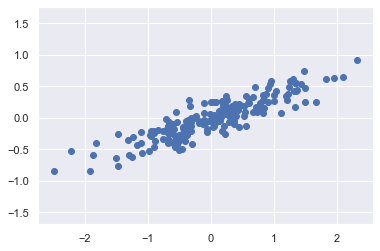

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal'); # more space on the plot

In [9]:
rng.rand(2,3)

array([[0.45173315, 0.37543483, 0.97535003],
       [0.16798329, 0.97278759, 0.76747487]])

In [4]:
?np.dot

In [4]:
X.shape

(200, 2)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [10]:
pca.components_.shape

(2, 2)

In [11]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

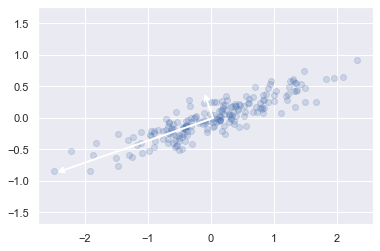

In [12]:
def draw_vec(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->',
                     linewidth = 2,
                     shrinkA = 0, shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops = arrowprops)

plt.scatter(X[:,0], X[:,1], alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3* np.sqrt(length)
    draw_vec(pca.mean_, pca.mean_+v)
plt.axis('equal')

In [13]:
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


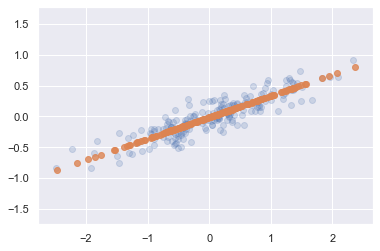

In [14]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Handwritten digits

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [19]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [21]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


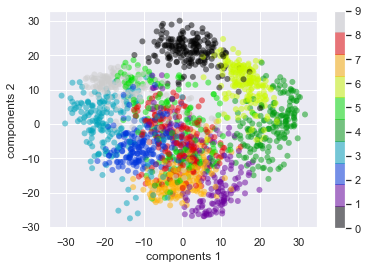

In [23]:
plt.scatter(projected[:,0], projected[:,1],
           c = digits.target, edgecolor = 'none',
           alpha = 0.5, 
           cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('components 1')
plt.ylabel('components 2')
plt.colorbar()

Text(0, 0.5, 'cumulative explained variance')

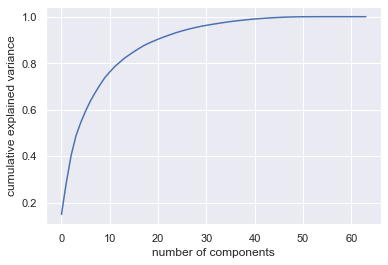

In [25]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# PCA and noise filtering

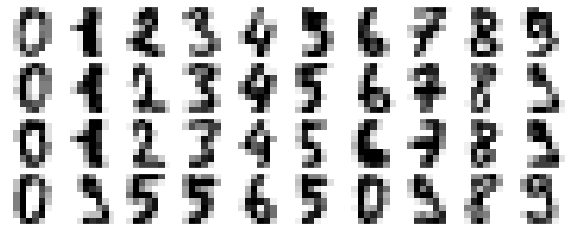

In [26]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10,4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace = 0.1, wspace =0.1)
                            )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), 
                 cmap = 'binary', interpolation = 'nearest',
                 clim = (0,16))
plot_digits(digits.data)

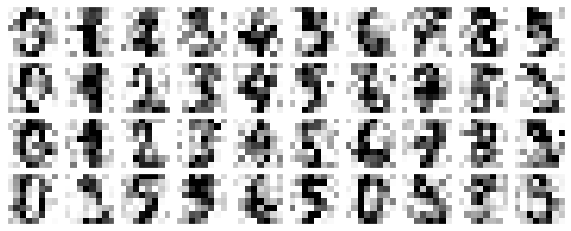

In [27]:
np.random.seed(4)
noise = np.random.normal(digits.data, 4) #(mu, std)
plot_digits(noise)

In [29]:
pca = PCA(0.5).fit(noise) # require the components to explain 50% of the variance
pca.n_components_

12

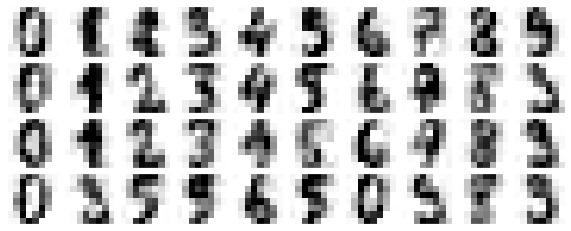

In [31]:
components = pca.transform(noise)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Eigenfaces 

In [33]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [34]:
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

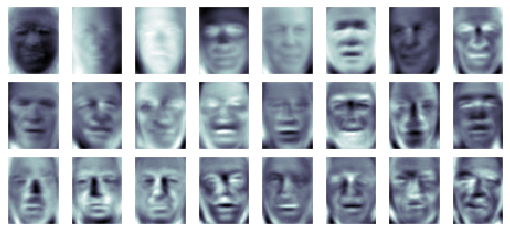

In [36]:
fig, axes = plt.subplots(3, 8, figsize = (9 ,4),
                        subplot_kw = dict(xticks = [], yticks = []),
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap = 'bone')

In [37]:
pca.components_.shape # loading vectors 150 in total. PCA(150)

(150, 2914)

Text(0, 0.5, 'cumulative sum of explained variance')

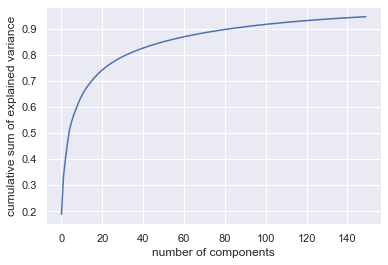

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative sum of explained variance')


In [40]:
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim/ninput')

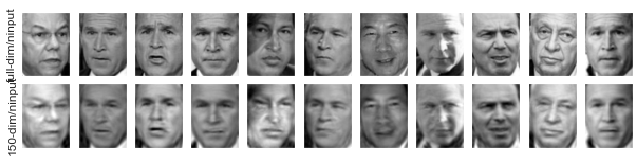

In [43]:
fig, ax = plt.subplots(2, 11, figsize = (11, 2.5),
                        subplot_kw = dict(xticks = [], yticks = []),
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i in range(11):
    ax[0, i].imshow(faces.data[i].reshape(62,47), cmap = 'binary_r')
    ax[1, i].imshow(projected[i].reshape(62,47), cmap = 'binary_r')
ax[0,0].set_ylabel('full-dim/ninput')
ax[1,0].set_ylabel('150-dim/ninput')